In [222]:
from pcsPy import *
import pickle,copy
from music21 import corpus
sys.path.append('../')
from tonalHarmonyDefs import enharmonicDictionary, shortHands, scoreAnalysis, tonalPartition, showAnalysis

In [221]:
ch = np.copy(PCSet([2, 5, 9, 0]).normalOrder().tolist())
print(ch.tolist())
for n in range(1,len(ch)):
    if ch[n] < ch[n-1]: ch[n] += 12
ch += 60
print(ch)
# p = []
# for c in ch:
#     p.append(notedict[c])
# print(p)
n = m21.chord.Chord(ch.tolist())
print(n.chordTablesAddress)
print(n,n.normalOrder)
print(m21.roman.romanNumeralFromChord(n, m21.key.Key('C'),preferSecondaryDominants=True).figure)

[9, 0, 2, 5]
[69 72 74 77]
ChordTableAddress(cardinality=4, forteClass=26, inversion=0, pcOriginal=9)
<music21.chord.Chord A4 C5 D5 F5> [9, 0, 2, 5]
ii43


In [31]:
es = m21.analysis.enharmonics.EnharmonicSimplifier([p for p in n.pitches])
print(es.allSpellings[2])

[<music21.pitch.Pitch G#4>, <music21.pitch.Pitch A-4>]


In [32]:
es.getAugDimScore(es.allSpellings[2])

4

In [2]:
score = m21.corpus.parse('PMFC_06_Giovanni-05_Donna').measures(1, 10)

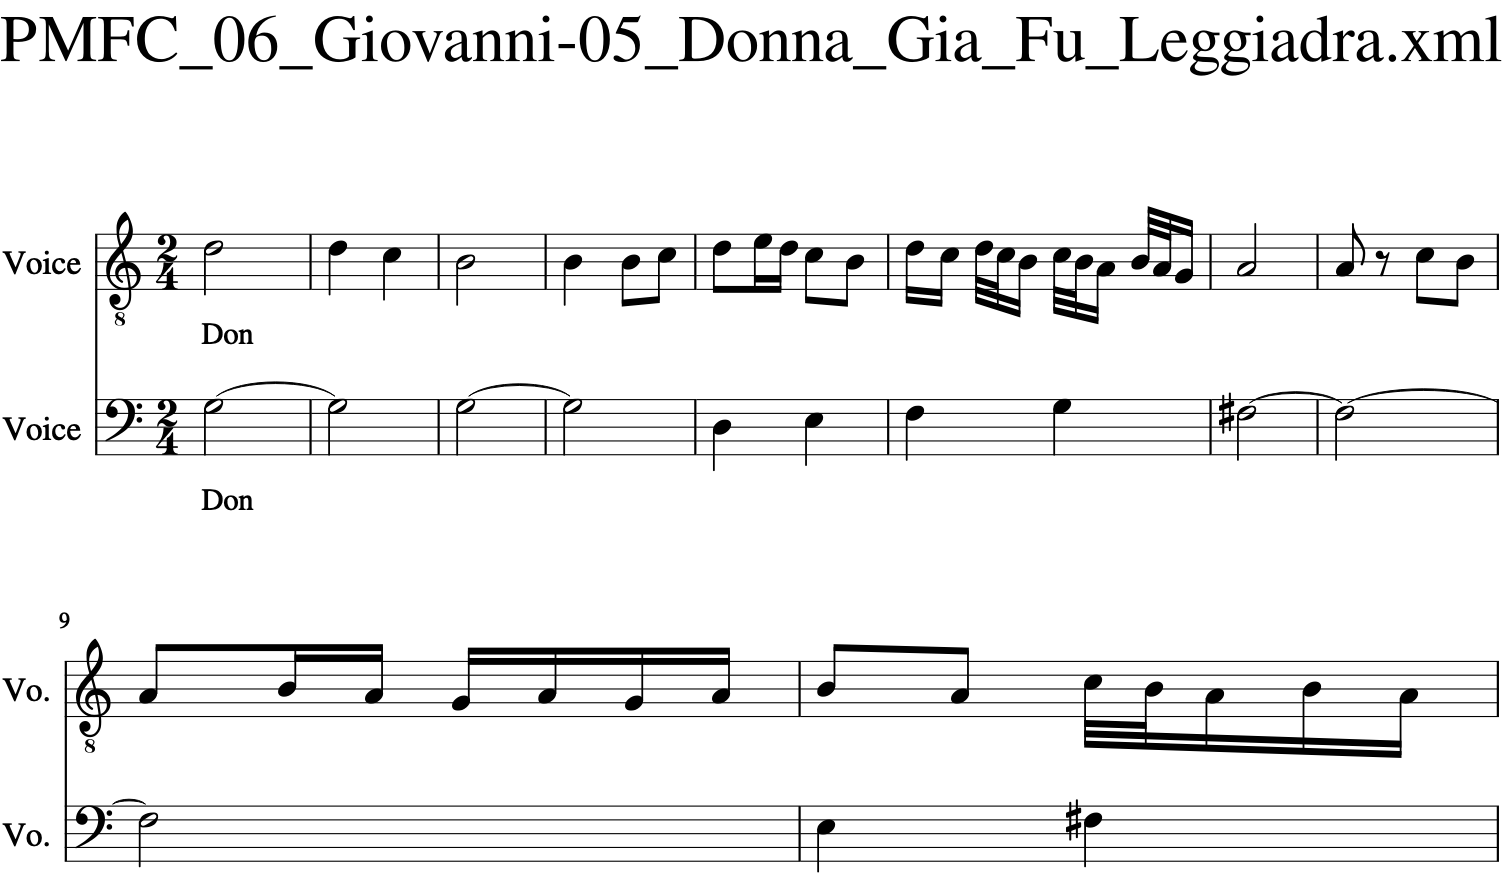

In [3]:
score.show()

In [9]:
import sys
sys.path.append('/Users/marco/Dropbox (Personal)/Musica/Applications/music21/music21/analysis')
from reduceChords import *
import unittest

In [28]:
class TestExternal(unittest.TestCase):  # pragma: no cover
    def runTest(self):
        pass

    def testTrecentoMadrigal(self):
        from music21 import corpus

        score = corpus.parse('PMFC_06_Giovanni-05_Donna').measures(1, 10)
#         score = corpus.parse('bach/bwv846').measures(1, 19)
#         score = corpus.parse('bach/bwv66.6')
#         score = corpus.parse('beethoven/opus18no1', 2).measures(1, 30)
#         score = corpus.parse('beethoven/opus18no1', 2).measures(1, 8)
#         score = corpus.parse('PMFC_06_Giovanni-05_Donna').measures(90, 118)
#         score = corpus.parse('PMFC_06_Piero_1').measures(1, 10)
#         score = corpus.parse('PMFC_06-Jacopo').measures(1, 30)
#         score = corpus.parse('PMFC_12_13').measures(1, 40)
#         score = corpus.parse('monteverdi/madrigal.4.16.xml').measures(1, 8)

        chordReducer = ChordReducer()
        reduction = chordReducer.run(
            score,
            allowableChords=(
                chord.Chord("F#4 A4 C5"),
            ),
            closedPosition=True,
            forbiddenChords=None,
            maximumNumberOfChords=3,
        )

        for part in reduction:
            score.insert(0, part)

        score.show()

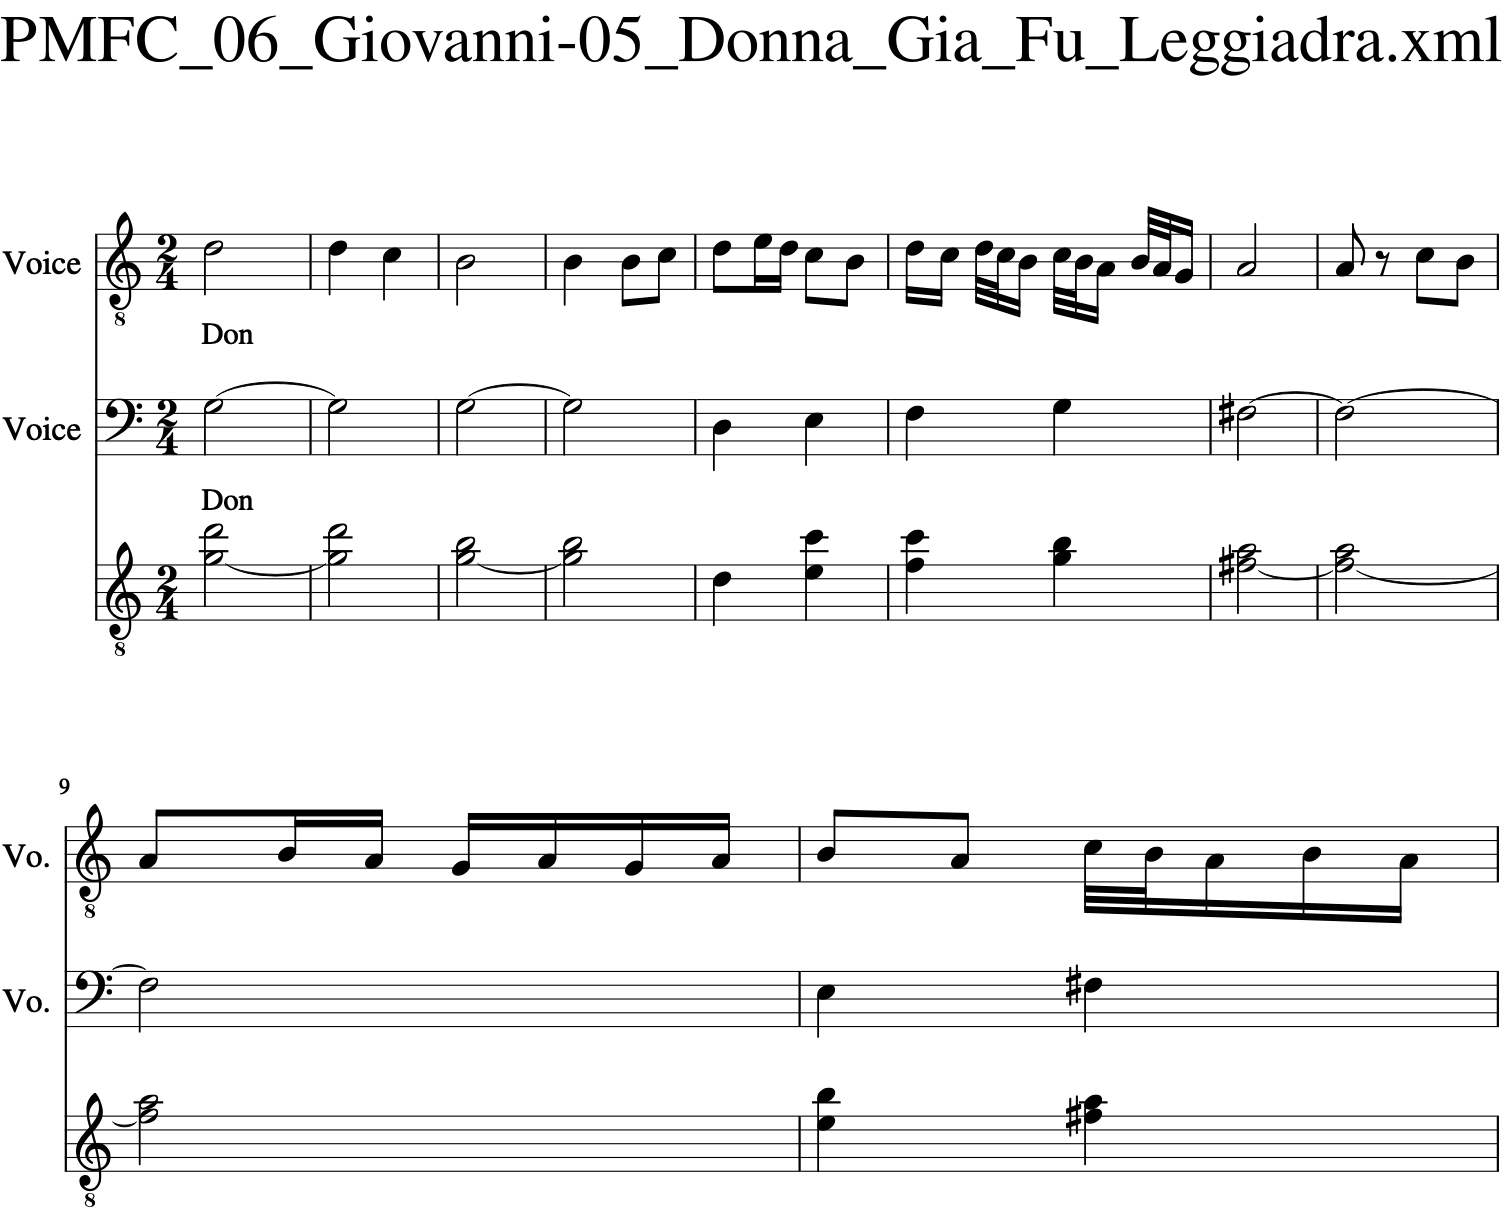

.
----------------------------------------------------------------------
Ran 1 test in 2.001s

OK


In [29]:
m21.mainTest(TestExternal)

In [34]:
d = {'A':{'a':1,'b':2},'B':{'c':3,'d':4}}

In [36]:
d['A']['a']

1

In [214]:
def enharmonicDictionary():
    keys = ['C','C#','D-','D','D#','E-','E','F','F#','G-','G','G#','A-','A','A#','B-','B']
    enharmonicDict = {}
    for k in keys:
        ini = m21.note.Note(60).nameWithOctave
        end = m21.note.Note(84).nameWithOctave
        major = [p for p in m21.scale.MajorScale(k).getPitches(ini,end)]
        minor = [p for p in m21.scale.MinorScale(k).getPitches(ini,end)]
        melod = [p for p in m21.scale.MelodicMinorScale(k).getPitches(ini,end)]
        harmo = [p for p in m21.scale.HarmonicMinorScale(k).getPitches(ini,end)]

        allscales = major+minor+melod+harmo

        clean = Remove(allscales)

        Cscale = sorted([str(f) for f in clean])
        Cscale = np.array(Cscale)

        Cmidi = []
        for n in Cscale:
            Cmidi.append(m21.pitch.Pitch(n).midi)
        Cmidi = np.array(Cmidi)
        idx = np.argsort(Cmidi)

        Cdict = dict(zip(Cmidi[idx[:]],Cscale[idx[:]]))

        for i in range(60,84):
            try:
                tmp = Cdict[i]
            except:
                Cdict.update({i:m21.note.Note(i).nameWithOctave})

        enharmonicDict.update({k:Cdict})
    return(enharmonicDict)

In [223]:
enharmonicDict = enharmonicDictionary()

In [233]:
n = m21.chord.Chord(['B4', 'C4', 'E4', 'G4'])
print(n)
print(m21.roman.romanNumeralFromChord(n,m21.key.Key('F')))
print(m21.roman.postFigureFromChordAndKey(n,m21.key.Key('F')))

<music21.chord.Chord B4 C4 E4 G4>
<music21.roman.RomanNumeral V#753 in F major>
#753
